In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import numpy.random
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# 최대 줄 수 설정
pd.set_option('display.max_rows', 500)

# 최대 열 수 설정
pd.set_option('display.max_columns', 500)

# 표시할 가로의 길이
pd.set_option('display.width', 1000)

## - Data Load

In [3]:
# 데이터 불러오기
train_dataset = pd.read_csv("../Dataset/train.csv")
test_dataset = pd.read_csv("../Dataset/test.csv")
train_dataset.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,USA,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,USA,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,NLD,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,USA,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,ITA,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


# - preprocessing

In [4]:
# 전처리 데이터는 따로 관리!
processed_train = train_dataset.drop(['index'], axis=1).copy()
processed_test = test_dataset.drop(['index'], axis =1).copy()

In [5]:
question_col = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12',
               'Q13','Q14','Q15','Q16','Q17','Q18', 'Q19','Q20','Q21',
                'Q22','Q23','Q24','Q25','Q26']

tipi_col = ['TIPI1','TIPI2','TIPI3','TIPI4',
            'TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10']

vcl_col = ['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6','VCL7', 'VCL8', 'VCL9','VCL10', 'VCL11', 'VCL12','VCL13' ,'VCL14', 'VCL15', 'VCL16']

vcl_fake_col = ['VCL6', 'VCL12', 'VCL13']

replace_type = {'education': str, 'engnat': str, 'married': str, 'urban': str, 'gender' : str, 'religion' : str,
               'orientation' : str, 'voted': str, 'ASD':str}

replace = ['education', 'engnat', 'married', 'urban', 'gender', 'religion', 
           'orientation', 'voted', 'ASD', 'hand']

- train dataset에서 familysize 이상치 제거 

In [6]:
# familysize가 말도 안되게 큰 2919 없애
remove_row2 = processed_train[processed_train['familysize'] == 2919].index
processed_train= processed_train.drop(remove_row2)

- familysize 

count    14999.000000
mean         2.298850
std          0.836904
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: familysize, dtype: float64


<AxesSubplot:xlabel='familysize'>

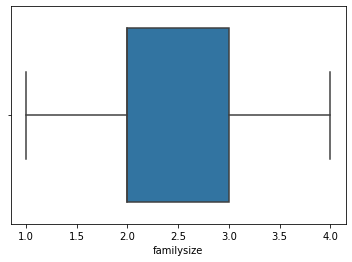

In [7]:
#familysize 어케 할까..
Q1 = processed_train['familysize'].quantile(0.25)
Q2 = processed_train['familysize'].quantile(0.5)
Q3 = processed_train['familysize'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
processed_train['familysize'] = processed_train['familysize'].apply(lambda x : np.nan if x < lower_fence or x > upper_fence else x)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
transformer =  IterativeImputer()
processed_train[['familysize', 'nerdiness']] = transformer.fit_transform(processed_train[['familysize', 'nerdiness']])
print(processed_train['familysize'].describe())
sns.boxplot(x='familysize', data=processed_train)

count    35452.000000
mean         2.293375
std          0.836971
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: familysize, dtype: float64


<AxesSubplot:xlabel='familysize'>

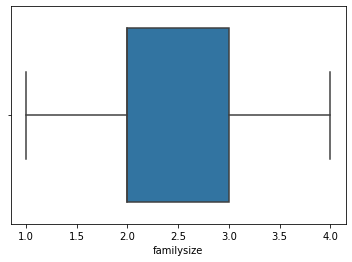

In [8]:
#familysize 어케 할까..
Q1 = processed_test['familysize'].quantile(0.25)
Q2 = processed_test['familysize'].quantile(0.5)
Q3 = processed_test['familysize'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
processed_test['familysize'] = processed_test['familysize'].apply(lambda x : np.nan if x < lower_fence or x > upper_fence else x)

processed_test[['familysize']] = transformer.fit_transform(processed_test[['familysize']])
print(processed_test['familysize'].describe())
sns.boxplot(x='familysize', data=processed_test)

- age 그룹별로

In [9]:
# age ranging 한다
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

bins= [10,20,30,40,50,60,70,80,90,100,40000]
labels = [10,20,30,40,50,60,70,80,90,100]
processed_train['age'] = pd.cut(processed_train['age'], bins=bins, labels=labels, right=False)
processed_test['age'] = pd.cut(processed_test['age'], bins=bins, labels=labels, right=False)

oe = OrdinalEncoder()
processed_train['age'] = oe.fit_transform(processed_train[['age']])
processed_test['age'] = oe.fit_transform(processed_test[['age']])

- Q1 ~ Q26 : reverse 할거 reverse 하고 평균내서 'mach score' col 만들어줌 (결측치는 fillna(0))

In [10]:
# Q score reverse
re_q = ['Q3','Q4','Q7','Q9','Q10','Q11','Q16','Q17', 'Q14', 'Q18']
for re in re_q:
    processed_train[re] = 6-processed_train[re]
    
for re in re_q:
    processed_test[re] = 6 - processed_test[re]
    
processed_train[question_col] = processed_train[question_col].fillna(0)
processed_test[question_col] = processed_test[question_col].fillna(0)

processed_train['mach_score'] = processed_train[question_col].mean(axis = 1)
processed_test['mach_score'] = processed_test[question_col].mean(axis = 1)

- TIPI score 계산 : reverse할거 해서 5개 점수 생성(결측치는 fillna(0))

In [11]:
# TIPI score 계산
# 참고 link - https://www.psychologytoday.com/us/blog/darwins-subterranean-world/201810/take-quick-personality-test
re_tipi = ['TIPI2', 'TIPI4', 'TIPI6', "TIPI8", 'TIPI10']
processed_train[re_tipi] = 6- processed_train[re_tipi]
processed_test[re_tipi] = 6- processed_test[re_tipi]

processed_train[tipi_col] = processed_train[tipi_col].fillna(0)
processed_test[tipi_col] = processed_test[tipi_col].fillna(0)

In [12]:
# 5개 점수 생성
processed_train['tp_ex']=(processed_train['TIPI1']+(processed_train['TIPI6']))/2
processed_train['tp_ag']=((processed_train['TIPI2'])+processed_train['TIPI7'])/2
processed_train['tp_co']=(processed_train['TIPI3']+(processed_train['TIPI8']))/2
processed_train['tp_em']=((processed_train['TIPI4'])+processed_train['TIPI9'])/2
processed_train['tp_op']=(processed_train['TIPI5']+(processed_train['TIPI10']))/2

processed_test['tp_ex']=(processed_test['TIPI1']+(processed_test['TIPI6']))/2
processed_test['tp_ag']=((processed_test['TIPI2'])+processed_test['TIPI7'])/2
processed_test['tp_co']=(processed_test['TIPI3']+(processed_test['TIPI8']))/2
processed_test['tp_em']=((processed_test['TIPI4'])+processed_test['TIPI9'])/2
processed_test['tp_op']=(processed_test['TIPI5']+(processed_test['TIPI10']))/2

- VCL score 계산 : fake col 만 계산해서 count, 기존 vcl 열들은 drop 처리

In [13]:
# vcl score 계산
vcl = processed_train[vcl_fake_col]
vcl = vcl.assign(vcl_fake_sum = "")

vcl['vcl_fake_sum'] = vcl[vcl_fake_col].sum(axis=1)
vcl = vcl['vcl_fake_sum']

processed_train = pd.concat([processed_train, vcl],axis=1)
processed_train = processed_train.drop(vcl_col, axis =1)

vcl_test = processed_test[vcl_fake_col]
vcl_test = vcl_test.assign(vcl_fake_sum = "")
vcl_test['vcl_fake_sum'] = vcl_test[vcl_fake_col].sum(axis=1)
vcl_test = vcl_test['vcl_fake_sum']

processed_test = pd.concat([processed_test, vcl_test],axis=1)
processed_test = processed_test.drop(vcl_col, axis =1)

- 하..country 해볼게..nerdiness 있는 비율 높은 거 3개 (100명 이상 있는 것들) train 기준
    - 높은거 : 'SWE', 'DEU', 'USA'
    - 중간 : 'NLD', 'ITA', 'GBR', 'AUS', 'POL', 'CAN', 'FRA', 'IDN', 'BRA', 'NOR', 'FIN'
    - 낮은 거 : 'PHL', 'NZL', 'MYS', 'MEX', 'IND', 'SGP'
    - 나머지 100명 이하
이렇게 나눠줄게요

In [14]:
# 코드 개더러움 주으ㅣ! ㅋㅋㅋ
country_train = processed_train['country'].unique()
country_train = country_train.tolist()

country_test = processed_test['country'].unique()
country_test = country_test.tolist()

country_nerdL = ['SWE', 'DEU', 'USA']
country_nerdM = ['NLD', 'ITA', 'GBR', 'AUS', 'POL', 'CAN', 'FRA', 'IDN', 'BRA', 'NOR', 'FIN']
country_nerdS = ['PHL', 'NZL', 'MYS', 'MEX', 'IND', 'SGP']

rm_set = {'SWE', 'DEU', 'USA','NLD', 'ITA', 
          'GBR', 'AUS', 'POL', 'CAN', 'FRA',
          'IDN', 'BRA', 'NOR', 'FIN', 'PHL', 
          'NZL', 'MYS', 'MEX', 'IND', 'SGP'}

country_train_nerd =[i for i in country_train if i not in rm_set]
country_test_nerd =[i for i in country_test if i not in rm_set]

country_dataset_tr = processed_train.iloc[:,26:28]

country_dataset_tr['country_nerdL'] = " "
country_dataset_tr['country_nerdM'] = " "
country_dataset_tr['country_nerdS'] = " "
country_dataset_tr['country_nerd'] = " "

country_dataset_tr = country_dataset_tr.drop('introelapse', axis=1)

country_dataset_tr['country_nerdL'] = country_dataset_tr['country'].isin(country_nerdL).astype(int)
country_dataset_tr['country_nerdM'] = country_dataset_tr['country'].isin(country_nerdM).astype(int)
country_dataset_tr['country_nerdS'] = country_dataset_tr['country'].isin(country_nerdS).astype(int)
country_dataset_tr['country_nerd'] = country_dataset_tr['country'].isin(country_train_nerd).astype(int)


country_dataset_te = processed_test.iloc[:,26:28]

country_dataset_te['country_nerdL'] = " "
country_dataset_te['country_nerdM'] = " "
country_dataset_te['country_nerdS'] = " "
country_dataset_te['country_nerd'] = " "

country_dataset_te = country_dataset_te.drop('introelapse', axis=1)

country_dataset_te['country_nerdL'] = country_dataset_te['country'].isin(country_nerdL).astype(int)
country_dataset_te['country_nerdM'] = country_dataset_te['country'].isin(country_nerdM).astype(int)
country_dataset_te['country_nerdS'] = country_dataset_te['country'].isin(country_nerdS).astype(int)
country_dataset_te['country_nerd'] = country_dataset_te['country'].isin(country_train_nerd).astype(int)

country_dataset_tr = country_dataset_tr.drop('country', axis=1)
country_dataset_te = country_dataset_te.drop('country', axis=1)

In [15]:
processed_train = pd.concat([processed_train, country_dataset_tr], axis =1)
processed_train = processed_train.drop('country', axis=1)

processed_test = pd.concat([processed_test, country_dataset_te], axis =1)
processed_test = processed_test.drop('country', axis=1)

In [16]:
processed_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,mach_score,tp_ex,tp_ag,tp_co,tp_em,tp_op,vcl_fake_sum,country_nerdL,country_nerdM,country_nerdS,country_nerd
0,1.0,5.0,1.0,1.0,1.0,4.0,1.0,5.0,5.0,3.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,3,553,6,4.0,3.0,5.0,5.0,3.0,1.0,5.0,3.0,5.0,3.0,2.0,1,3.0,1.0,1.0,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1.0,2.884615,2.5,4.0,4.0,5.0,3.0,0,1,0,0,0
1,4.0,4.0,2.0,2.0,4.0,5.0,2.0,4.0,3.0,3.0,5.0,4.0,5.0,3.0,1.0,4.0,2.0,1.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,5,85,120,4.0,4.0,3.0,1.0,3.0,4.0,5.0,5.0,2.0,4.0,4.0,2,2.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1.0,3.038462,4.0,4.5,4.0,1.5,3.5,1,1,0,0,0
2,4.0,5.0,1.0,2.0,3.0,5.0,1.0,5.0,2.0,2.0,4.0,5.0,5.0,1.0,1.0,3.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,9,108,100,1.0,4.0,3.0,5.0,5.0,1.0,3.0,2.0,5.0,4.0,2.0,1,1.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,2.923077,1.0,3.5,2.5,5.0,4.5,1,0,1,0,0
3,4.0,4.0,2.0,4.0,4.0,3.0,3.0,5.0,3.0,2.0,1.0,2.0,2.0,2.0,4.0,4.0,2.0,1.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,2,121,139,3.0,3.0,3.0,2.0,5.0,3.0,4.0,2.0,3.0,3.0,1.0,3,1.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,3.038462,3.0,3.5,2.5,2.5,4.0,1,1,0,0,0
4,4.0,4.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,4.0,3.0,1.0,5.0,4.0,2.0,5.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,3,640,216,3.0,3.0,4.0,2.0,4.0,2.0,3.0,2.0,3.0,4.0,1.0,2,2.0,2.0,0.0,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0.0,3.076923,2.5,3.0,3.0,2.5,4.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,2.0,3.0,3.0,4.0,2.0,4.0,3.0,2.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,12,103,161,2.0,4.0,4.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0,2,2.0,1.0,0.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0.0,3.115385,1.5,3.5,3.5,3.0,3.0,2,1,0,0,0
14996,5.0,4.0,1.0,2.0,4.0,5.0,1.0,4.0,2.0,1.0,5.0,4.0,4.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,31,106,179,3.0,4.0,4.0,1.0,4.0,3.0,4.0,5.0,2.0,4.0,4.0,1,2.0,2.0,3.0,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,3.115385,3.0,4.0,4.5,1.5,4.0,0,1,0,0,0
14997,4.0,5.0,1.0,1.0,5.0,5.0,1.0,5.0,2.0,1.0,2.0,5.0,5.0,1.0,5.0,1.0,1.0,1.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,17,103,168,1.0,3.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,5.0,2.0,2,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,3.230769,1.0,3.0,2.5,1.0,3.0,1,1,0,0,0
14998,5.0,5.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,14,68,109,1.0,5.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,5.0,3.0,2,2.0,1.0,1.0,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0.0,2.961538,1.0,5.0,2.5,1.5,4.5,2,1,0,0,0


- 'education', 'engnat', 'married', 'urban', 'gender', 'religion','orientation', 'voted', 'ASD', 'hand' 
    결측치 : fillna(0)
        + 타입 변환 후 dummy encoding

In [17]:
processed_train[replace] = processed_train[replace].fillna(0)
processed_test[replace] = processed_test[replace].fillna(0)

In [18]:
processed_train = processed_train.astype(replace_type)
processed_test = processed_test.astype(replace_type)

In [19]:
processed_train = pd.get_dummies(processed_train)
processed_test = pd.get_dummies(processed_test)

In [20]:
processed_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,age,hand,familysize,nerdiness,mach_score,tp_ex,tp_ag,tp_co,tp_em,tp_op,vcl_fake_sum,country_nerdL,country_nerdM,country_nerdS,country_nerd,education_0.0,education_1.0,education_2.0,education_3.0,education_4.0,urban_0,urban_1,urban_2,urban_3,gender_0.0,gender_1.0,gender_2.0,gender_3.0,engnat_0.0,engnat_1.0,engnat_2.0,religion_0.0,religion_1.0,religion_10.0,religion_11.0,religion_12.0,religion_2.0,religion_3.0,religion_4.0,religion_5.0,religion_6.0,religion_7.0,religion_8.0,religion_9.0,orientation_0.0,orientation_1.0,orientation_2.0,orientation_3.0,orientation_4.0,orientation_5.0,voted_0.0,voted_1.0,voted_2.0,married_0.0,married_1.0,married_2.0,married_3.0,ASD_0.0,ASD_1.0,ASD_2.0
0,1.0,5.0,1.0,1.0,1.0,4.0,1.0,5.0,5.0,3.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,3,553,6,4.0,3.0,5.0,5.0,3.0,1.0,5.0,3.0,5.0,3.0,1.0,2.0,4.0,1.0,2.884615,2.5,4.0,4.0,5.0,3.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
1,4.0,4.0,2.0,2.0,4.0,5.0,2.0,4.0,3.0,3.0,5.0,4.0,5.0,3.0,1.0,4.0,2.0,1.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,5,85,120,4.0,4.0,3.0,1.0,3.0,4.0,5.0,5.0,2.0,4.0,3.0,1.0,4.0,1.0,3.038462,4.0,4.5,4.0,1.5,3.5,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,4.0,5.0,1.0,2.0,3.0,5.0,1.0,5.0,2.0,2.0,4.0,5.0,5.0,1.0,1.0,3.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,9,108,100,1.0,4.0,3.0,5.0,5.0,1.0,3.0,2.0,5.0,4.0,3.0,1.0,4.0,1.0,2.923077,1.0,3.5,2.5,5.0,4.5,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
3,4.0,4.0,2.0,4.0,4.0,3.0,3.0,5.0,3.0,2.0,1.0,2.0,2.0,2.0,4.0,4.0,2.0,1.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,2,121,139,3.0,3.0,3.0,2.0,5.0,3.0,4.0,2.0,3.0,3.0,0.0,2.0,2.0,1.0,3.038462,3.0,3.5,2.5,2.5,4.0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,4.0,4.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,4.0,3.0,1.0,5.0,4.0,2.0,5.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,3,640,216,3.0,3.0,4.0,2.0,4.0,2.0,3.0,2.0,3.0,4.0,0.0,2.0,1.0,0.0,3.076923,2.5,3.0,3.0,2.5,4.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,2.0,3.0,3.0,4.0,2.0,4.0,3.0,2.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,12,103,161,2.0,4.0,4.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,0.0,1.0,3.0,0.0,3.115385,1.5,3.5,3.5,3.0,3.0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
14996,5.0,4.0,1.0,2.0,4.0,5.0,1.0,4.0,2.0,1.0,5.0,4.0,4.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,31,106,179,3.0,4.0,4.0,1.0,4.0,3.0,4.0,5.0,2.0,4.0,3.0,1.0,3.0,1.0,3.115385,3.0,4.0,4.5,1.5,4.0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
14997,4.0,5.0,1.0,1.0,5.0,5.0,1.0,5.0,2.0,1.0,2.0,5.0,5.0,1.0,5.0,1.0,1.0,1.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,17,103,168,1.0,3.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,5.0,1.0,1.0,3.0,1.0,3.230769,1.0,3.0,2.5,1.0,3.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
14998,5.0,5.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,14,68,109,1.0,5.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,5.0,1.0,1.0,2.0,0.0,2.961538,1.0,5.0,2.5,1.5,4.5,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,

### - Data Split & Modeling

In [21]:
train_data = processed_train.copy()

input_y = train_data['nerdiness'].copy()
input_X = train_data.drop(['nerdiness'], axis=1)

In [22]:
train_X, test_X, train_y, test_y = train_test_split(
    input_X, 
    input_y, 
    test_size = 0.2, 
    random_state = 3,
    shuffle=True
)

In [23]:
import tpot
pipeline_optimizer = tpot.TPOTClassifier(generations=20, # 몇 세대에 걸쳐서 모델을 탐색할지 클수록 높은 성능 모델 찾을 확률 up
                                         population_size=50, # 매 generation 마다 남겨놓을 pipeline 수
                                         cv=5, # cross-validation
                                         scoring='roc_auc',
                                         random_state = 3,
                                         verbosity=2,
                                         early_stop=130,n_jobs=20) 
pipeline_optimizer.fit(train_X, train_y) 
print(pipeline_optimizer.score(test_X, test_y))

Optimization Progress:   0%|          | 0/1050 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8571083411870186

Generation 2 - Current best internal CV score: 0.8571083411870186

Generation 3 - Current best internal CV score: 0.8571083411870186

Generation 4 - Current best internal CV score: 0.8571083411870186

Generation 5 - Current best internal CV score: 0.8571083411870186

Generation 6 - Current best internal CV score: 0.8571083411870186

Generation 7 - Current best internal CV score: 0.8571083411870186

Generation 8 - Current best internal CV score: 0.8571083411870186

Generation 9 - Current best internal CV score: 0.8612704170521844

Generation 10 - Current best internal CV score: 0.8612704170521844

Generation 11 - Current best internal CV score: 0.8646187676075575

Generation 12 - Current best internal CV score: 0.8655642574570382

Generation 13 - Current best internal CV score: 0.866355724071836

Generation 14 - Current best internal CV score: 0.867983573330234

Generation 15 - Current best internal CV score: 0.86897483

In [24]:
pipeline_optimizer.export('tpot_0819.py')

In [25]:
model_pred = pipeline_optimizer.predict(test_X)
prob_pred = pipeline_optimizer.predict_proba(test_X)[:,1] #proba를 통해 확률값으로 변환
print(roc_auc_score(test_y, model_pred))
print(roc_auc_score(test_y, prob_pred))

0.8036376589529155
0.8928795179860236


### - Saving Model

In [26]:
test = processed_test.copy()

In [27]:
test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,age,hand,familysize,mach_score,tp_ex,tp_ag,tp_co,tp_em,tp_op,vcl_fake_sum,country_nerdL,country_nerdM,country_nerdS,country_nerd,education_0.0,education_1.0,education_2.0,education_3.0,education_4.0,urban_0,urban_1,urban_2,urban_3,gender_0.0,gender_1.0,gender_2.0,gender_3.0,engnat_0.0,engnat_1.0,engnat_2.0,religion_0.0,religion_1.0,religion_10.0,religion_11.0,religion_12.0,religion_2.0,religion_3.0,religion_4.0,religion_5.0,religion_6.0,religion_7.0,religion_8.0,religion_9.0,orientation_0.0,orientation_1.0,orientation_2.0,orientation_3.0,orientation_4.0,orientation_5.0,voted_0.0,voted_1.0,voted_2.0,married_0.0,married_1.0,married_2.0,married_3.0,ASD_0.0,ASD_1.0,ASD_2.0
0,4.0,4.0,3.0,1.0,5.0,5.0,3.0,5.0,2.0,1.0,3.0,4.0,5.0,2.0,5.0,4.0,1.0,2.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,9,114,243,2.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,5.0,0.0,1.0,3.000000,3.576923,2.0,2.5,3.0,2.5,4.0,3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
1,4.0,5.0,2.0,2.0,5.0,4.0,1.0,5.0,1.0,2.0,1.0,4.0,5.0,2.0,4.0,2.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,4.0,5.0,18,107,206,1.0,2.0,3.0,1.0,4.0,1.0,3.0,3.0,3.0,5.0,2.0,1.0,2.293375,3.307692,1.0,2.5,3.0,2.0,4.5,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
2,5.0,5.0,1.0,1.0,4.0,5.0,1.0,5.0,1.0,2.0,5.0,5.0,5.0,2.0,4.0,3.0,2.0,1.0,2.0,3.0,5.0,4.0,5.0,5.0,1.0,5.0,4,87,191,3.0,3.0,4.0,3.0,4.0,2.0,5.0,3.0,2.0,5.0,0.0,1.0,3.000000,3.346154,2.5,4.0,3.5,2.5,4.5,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
3,5.0,4.0,3.0,2.0,5.0,4.0,1.0,4.0,2.0,1.0,2.0,5.0,3.0,4.0,2.0,3.0,2.0,1.0,5.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,2409,155,258,1.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,3.0,5.0,1.0,1.0,3.000000,3.076923,1.5,3.0,2.5,3.0,4.5,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
4,5.0,5.0,1.0,1.0,5.0,3.0,1.0,5.0,1.0,1.0,5.0,3.0,5.0,3.0,5.0,1.0,1.0,2.0,1.0,5.0,2.0,3.0,5.0,5.0,3.0,3.0,24,163,289,3.0,3.0,3.0,1.0,5.0,2.0,3.0,2.0,3.0,2.0,0.0,1.0,2.000000,3.076923,2.5,3.0,2.5,2.0,3.5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,1.0,3.0,3.0,4.0,1.0,5.0,2.0,3.0,1.0,4.0,5.0,2.0,3.0,1.0,1.0,2.0,4.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,10,200,254,3.0,1.0,5.0,1.0,5.0,3.0,5.0,3.0,3.0,5.0,0.0,3.0,3.000000,3.153846,3.0,3.0,4.0,2.0,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
35448,5.0,5.0,1.0,1.0,5.0,4.0,1.0,3.0,1.0,3.0,1.0,5.0,5.0,1.0,2.0,1.0,1.0,1.0,5.0,5.0,5.0,2.0,4.0,4.0,3.0,5.0,504,136,155,3.0,3.0,5.0,1.0,3.0,1.0,5.0,3.0,1.0,4.0,0.0,3.0,2.000000,3.038462,2.0,4.0,4.0,1.0,3.5,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
35449,5.0,5.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,5.0,4.0,5.0,27,121,191,1.0,1.0,4.0,3.0,4.0,3.0,3.0,1.0,2.0,5.0,2.0,1.0,2.000000,3.346154,2.0,2.0,2.5,2.5,4.5,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
35450,5.0,5.0,2.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,4.0,1.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,3,58,105,3.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,0.0,1.0,2.293375,3.153846,2.0,3.0,5.0,5.0,5.0,3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,

In [28]:
pipeline_optimizer_pred = pipeline_optimizer.predict_proba(test)[:, 1]
submission = pd.read_csv("../Dataset/sample_submission.csv")
submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


In [29]:
submission["nerdiness"] = pipeline_optimizer_pred
submission

,index,nerdiness
0,0,0.160500
1,1,0.958000
2,2,0.854667
3,3,0.686500
4,4,0.604167
...,...,...
35447,35447,0.949500
35448,35448,0.934500
35449,35449,0.942500
35450,35450,0.747333


In [30]:
import datetime
filename = datetime.datetime.now().strftime("%m%d_%H_%M")
submission.to_csv("../Dataset/"+ filename +".csv", index = False)